Обзор Данных


Для начала импортируем нужные нам библиотеки


In [121]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

Прочитаем все данные и внесём их в переменные

In [122]:
data_calls = pd.read_csv("datasets/calls.csv")
data_internet = pd.read_csv("datasets/internet.csv")
data_messages = pd.read_csv("datasets/messages.csv")
data_tariffs = pd.read_csv("datasets/tariffs.csv")
data_users = pd.read_csv("datasets/users.csv")

Посмотрим на данные во всех таблицах ( посмотрим по 10 строк)


In [123]:
print(data_calls.head(10))

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
5  1000_5  2018-11-02      0.00     1000
6  1000_6  2018-10-18      0.00     1000
7  1000_7  2018-08-22     18.31     1000
8  1000_8  2018-09-15     18.44     1000
9  1000_9  2018-08-15      0.00     1000


In [124]:
print(data_internet.head(10))

   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000
5           5  1000_5   399.97   2018-10-02     1000
6           6  1000_6   540.08   2018-09-07     1000
7           7  1000_7   415.70   2018-07-11     1000
8           8  1000_8   505.40   2018-10-08     1000
9           9  1000_9   345.54   2018-09-03     1000


In [125]:
print(data_messages.head(10))

       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000
5  1000_5   2018-06-20     1000
6  1000_6   2018-11-19     1000
7  1000_7   2018-10-29     1000
8  1000_8   2018-06-25     1000
9  1000_9   2018-12-18     1000


In [126]:
print(data_tariffs.head(10))

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  


In [127]:
print(data_users.head(10))

   user_id  age churn_date              city first_name  last_name  \
0     1000   52        NaN         Краснодар     Рафаил  Верещагин   
1     1001   41        NaN            Москва       Иван       Ежов   
2     1002   59        NaN       Стерлитамак    Евгений  Абрамович   
3     1003   23        NaN            Москва      Белла   Белякова   
4     1004   68        NaN       Новокузнецк    Татьяна   Авдеенко   
5     1005   67        NaN  Набережные Челны   Афанасий     Горлов   
6     1006   21        NaN         Ульяновск     Леонид   Ермолаев   
7     1007   65        NaN            Москва        Юна   Березина   
8     1008   63        NaN         Челябинск     Рустэм  Пономарёв   
9     1009   24        NaN             Пермь   Василиса    Блинова   

     reg_date tariff  
0  2018-05-25  ultra  
1  2018-11-01  smart  
2  2018-06-17  smart  
3  2018-08-17  ultra  
4  2018-05-14  ultra  
5  2018-01-25  smart  
6  2018-02-26  smart  
7  2018-04-19  smart  
8  2018-12-19  smart  

Проверим типы данных в столбцах и проведём предобработку данных



In [128]:
print(data_calls['call_date'].unique())

['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' '2018-09-16' '2018-11-21'
 '2018-10-28' '2018-08-29' '2018-08-13' '2018-07-18' '2018-06-03'
 '2018-09-03' '2018-08-14' '2018-11-01' '2018-05-26' '2018-11-23'
 '2018-09-30' '2018-11-09' '2018-08-01' '2018-06-18' '2018-10-20'
 '2018-11-07' '2018-08-04' '2018-09-06' '2018-10-27' '2018-10-15'
 '2018-10-

Данные представлены в строковом формате, приведём их к формату даты

In [129]:
data_calls["call_date"] = pd.to_datetime(data_calls["call_date"], format="%Y-%m-%d")
print(data_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None


Проверим на дубликаты по id
id - уникальный идентификатор звонка, если есть дубликаты id => есть ошибка в данных

In [130]:
print(data_calls["id"].nunique())

202607


В столбце id дубликаты не найдены, так как количество уникальных значений равно количеству строк в данном столбце

In [131]:
print(data_calls['duration'].value_counts())

duration
0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: count, Length: 2871, dtype: int64


Проверим на пропуски таблицу data_calls

In [132]:
print(data_calls[data_calls['id'].isna()].head(5))
print(data_calls[data_calls['user_id'].isna()].head(5))
print(data_calls[data_calls['call_date'].isna()].head(5))
print(data_calls[data_calls['duration'].isna()].head(5))

Empty DataFrame
Columns: [id, call_date, duration, user_id]
Index: []
Empty DataFrame
Columns: [id, call_date, duration, user_id]
Index: []
Empty DataFrame
Columns: [id, call_date, duration, user_id]
Index: []
Empty DataFrame
Columns: [id, call_date, duration, user_id]
Index: []


Проверим таблицу data_internet

In [133]:
print(data_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


In [134]:
print(type(data_internet["session_date"][0]))

<class 'str'>


Мы выявили данные даты в виде строки, для анализа следует привести их к типу даты

In [135]:
data_internet["session_date"] = pd.to_datetime(data_internet["session_date"], format="%Y-%m-%d")
data_internet = data_internet.drop(columns='Unnamed: 0', axis=1)
print(data_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB
None


In [136]:
print(data_internet[data_internet['id'].isna()].head(5))
print(data_internet[data_internet['user_id'].isna()].head(5))
print(data_internet[data_internet['session_date'].isna()].head(5))
print(data_internet[data_internet['mb_used'].isna()].head(5))

Empty DataFrame
Columns: [id, mb_used, session_date, user_id]
Index: []
Empty DataFrame
Columns: [id, mb_used, session_date, user_id]
Index: []
Empty DataFrame
Columns: [id, mb_used, session_date, user_id]
Index: []
Empty DataFrame
Columns: [id, mb_used, session_date, user_id]
Index: []


Пропусков не обнаружено

Проверим таблицу data_messages

In [137]:
print(data_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


Приведём данные столбца messages_date к типу даты

In [138]:
data_messages["message_date"] = pd.to_datetime(data_messages['message_date'], format="%Y-%m-%d")
print(data_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None


Данные для анализа подготовлены


<h1>Шаг 3: проанализируем поведение каждого пользователя в месяц</h1>

In [139]:
data_calls_users = pd.merge(data_calls, data_users, on='user_id')
print(data_calls_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          202607 non-null  object        
 1   call_date   202607 non-null  datetime64[ns]
 2   duration    202607 non-null  float64       
 3   user_id     202607 non-null  int64         
 4   age         202607 non-null  int64         
 5   churn_date  9919 non-null    object        
 6   city        202607 non-null  object        
 7   first_name  202607 non-null  object        
 8   last_name   202607 non-null  object        
 9   reg_date    202607 non-null  object        
 10  tariff      202607 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 17.0+ MB
None


In [140]:
data_calls_users["reg_date"] = pd.to_datetime(data_calls_users['reg_date'], format="%Y-%m-%d")
print(data_calls_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          202607 non-null  object        
 1   call_date   202607 non-null  datetime64[ns]
 2   duration    202607 non-null  float64       
 3   user_id     202607 non-null  int64         
 4   age         202607 non-null  int64         
 5   churn_date  9919 non-null    object        
 6   city        202607 non-null  object        
 7   first_name  202607 non-null  object        
 8   last_name   202607 non-null  object        
 9   reg_date    202607 non-null  datetime64[ns]
 10  tariff      202607 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 17.0+ MB
None


Добавляем столбец месяца в таблицу

In [141]:
data_calls_users['month'] = data_calls_users['call_date'].dt.to_period("M")


Группируем по user_id, месяцу и тарифу, подсчитываем длительность звонков

In [142]:
monthly_calls = data_calls_users.groupby(['user_id', 'month', 'tariff'])['duration'].sum().reset_index()
print(monthly_calls)

      user_id    month tariff  duration
0        1000  2018-05  ultra    150.06
1        1000  2018-06  ultra    158.90
2        1000  2018-07  ultra    318.80
3        1000  2018-08  ultra    389.87
4        1000  2018-09  ultra    440.14
...       ...      ...    ...       ...
3169     1498  2018-10  smart    232.63
3170     1499  2018-09  smart     64.65
3171     1499  2018-10  smart    429.91
3172     1499  2018-11  smart    576.50
3173     1499  2018-12  smart    465.16

[3174 rows x 4 columns]


<h6>Посчитаем среднее значение, дисперсию и стандартное отклонение</h6>

In [143]:
avg_minutes_per_tariff = data_calls_users.groupby(['month', 'tariff'])['duration'].mean().reset_index()
print(avg_minutes_per_tariff) # рассчитали среднее занчение

      month tariff  duration
0   2018-01  smart  6.974963
1   2018-01  ultra  6.809346
2   2018-02  smart  7.040704
3   2018-02  ultra  6.753962
4   2018-03  smart  6.771824
5   2018-03  ultra  6.831993
6   2018-04  smart  6.747334
7   2018-04  ultra  6.738721
8   2018-05  smart  6.611283
9   2018-05  ultra  6.643781
10  2018-06  smart  6.718277
11  2018-06  ultra  6.786695
12  2018-07  smart  6.795756
13  2018-07  ultra  6.799307
14  2018-08  smart  6.746361
15  2018-08  ultra  6.760233
16  2018-09  smart  6.793373
17  2018-09  ultra  6.824590
18  2018-10  smart  6.708741
19  2018-10  ultra  6.808866
20  2018-11  smart  6.675857
21  2018-11  ultra  6.801206
22  2018-12  smart  6.793796
23  2018-12  ultra  6.716893


In [152]:
stats_per_tariff_calls = data_calls_users.groupby(['month', 'tariff'])['duration'].agg(['var', 'std']).reset_index()
print(stats_per_tariff_calls)

      month tariff        var       std
0   2018-01  smart  35.827894  5.985641
1   2018-01  ultra  36.112254  6.009347
2   2018-02  smart  34.612611  5.883248
3   2018-02  ultra  32.134512  5.668731
4   2018-03  smart  33.790706  5.812977
5   2018-03  ultra  35.308513  5.942097
6   2018-04  smart  34.540648  5.877129
7   2018-04  ultra  34.270921  5.854137
8   2018-05  smart  33.354986  5.775378
9   2018-05  ultra  34.266769  5.853782
10  2018-06  smart  33.911600  5.823367
11  2018-06  ultra  34.422037  5.867030
12  2018-07  smart  34.634499  5.885108
13  2018-07  ultra  33.811895  5.814800
14  2018-08  smart  34.571332  5.879739
15  2018-08  ultra  34.144186  5.843303
16  2018-09  smart  34.183774  5.846689
17  2018-09  ultra  33.986318  5.829779
18  2018-10  smart  33.975892  5.828884
19  2018-10  ultra  33.977091  5.828987
20  2018-11  smart  34.014018  5.832154
21  2018-11  ultra  34.454634  5.869807
22  2018-12  smart  33.966655  5.828092
23  2018-12  ultra  34.124556  5.841623


<h6>Построим гистограммы</h6>

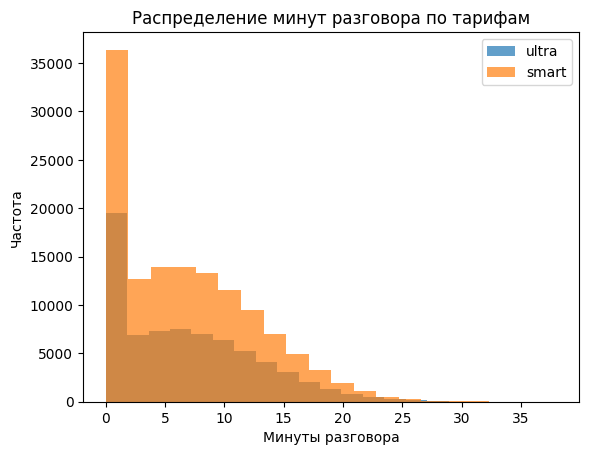

In [153]:
for tariff in data_calls_users['tariff'].unique():
    tariff_data = data_calls_users[data_calls_users['tariff'] == tariff]
    plt.hist(tariff_data['duration'], bins=20, alpha=0.7, label=tariff)
plt.title('Распределение минут разговора по тарифам')
plt.xlabel('Минуты разговора')
plt.ylabel('Частота')
plt.legend()
plt.show()

<h3>Посчитаем для сообщений</h3>

<h6>Объединим таблицы messages и users</h6>

In [154]:
data_messages_users = pd.merge(data_messages, data_users, on='user_id')

Добавим столбец месяца 

In [155]:
data_messages_users['month'] = data_messages_users['message_date'].dt.to_period("M")
print(data_messages_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   age           123036 non-null  int64         
 4   churn_date    5339 non-null    object        
 5   city          123036 non-null  object        
 6   first_name    123036 non-null  object        
 7   last_name     123036 non-null  object        
 8   reg_date      123036 non-null  object        
 9   tariff        123036 non-null  object        
 10  month         123036 non-null  period[M]     
dtypes: datetime64[ns](1), int64(2), object(7), period[M](1)
memory usage: 10.3+ MB
None


Теперь посчитаем общее количество отправленных сообщений для каждого пользователя в месяц

In [156]:
monthly_messages = data_messages_users.groupby(['month', 'tariff', 'user_id']).size().reset_index(name='count')
print(monthly_messages)

        month tariff  user_id  count
0     2018-01  smart     1005      7
1     2018-01  smart     1032     38
2     2018-01  smart     1045      5
3     2018-01  smart     1055     30
4     2018-01  smart     1071     16
...       ...    ...      ...    ...
2712  2018-12  ultra     1476     11
2713  2018-12  ultra     1485    155
2714  2018-12  ultra     1491     51
2715  2018-12  ultra     1493     78
2716  2018-12  ultra     1495     84

[2717 rows x 4 columns]


Сгруппируем пользователей по тарифным планам и рассчитаем среднее количество сообщений в месяц для каждого тарифа.

In [157]:
avg_messages_per_tariff = monthly_messages.groupby(['month', 'tariff'])['count'].mean().reset_index()
print(avg_messages_per_tariff)

      month tariff      count
0   2018-01  smart  20.000000
1   2018-01  ultra  43.428571
2   2018-02  smart  27.940000
3   2018-02  ultra  32.937500
4   2018-03  smart  35.550725
5   2018-03  ultra  47.800000
6   2018-04  smart  35.864583
7   2018-04  ultra  44.512821
8   2018-05  smart  39.032787
9   2018-05  ultra  48.769231
10  2018-06  smart  38.577465
11  2018-06  ultra  52.313433
12  2018-07  smart  38.988506
13  2018-07  ultra  62.136986
14  2018-08  smart  38.750000
15  2018-08  ultra  58.897727
16  2018-09  smart  39.219731
17  2018-09  ultra  63.294737
18  2018-10  smart  39.082677
19  2018-10  ultra  69.776699
20  2018-11  smart  39.881481
21  2018-11  ultra  66.159292
22  2018-12  smart  42.264808
23  2018-12  ultra  72.008547


Рассчитаем дисперсию и стандартное отклонение

In [158]:
stats_per_tariff_messages = monthly_messages.groupby(['month', 'tariff'])['count'].agg(['var', 'std']).reset_index()
print(stats_per_tariff_messages)

      month tariff          var        std
0   2018-01  smart   252.133333  15.878707
1   2018-01  ultra   765.285714  27.663798
2   2018-02  smart   440.465714  20.987275
3   2018-02  ultra   713.395833  26.709471
4   2018-03  smart   669.780477  25.880117
5   2018-03  ultra  1826.666667  42.739521
6   2018-04  smart   517.865680  22.756662
7   2018-04  ultra  1408.256410  37.526743
8   2018-05  smart   638.775776  25.274014
9   2018-05  ultra  1559.553544  39.491183
10  2018-06  smart   731.635801  27.048767
11  2018-06  ultra  1935.672999  43.996284
12  2018-07  smart   719.352468  26.820747
13  2018-07  ultra  2190.730974  46.805245
14  2018-08  smart   767.213054  27.698611
15  2018-08  ultra  2022.966432  44.977399
16  2018-09  smart   702.505555  26.504821
17  2018-09  ultra  1906.763270  43.666501
18  2018-10  smart   736.503019  27.138589
19  2018-10  ultra  2426.606511  49.260598
20  2018-11  smart   711.361366  26.671359
21  2018-11  ultra  2249.295828  47.426742
22  2018-12

<h6>Посторим гистограммы</h6>

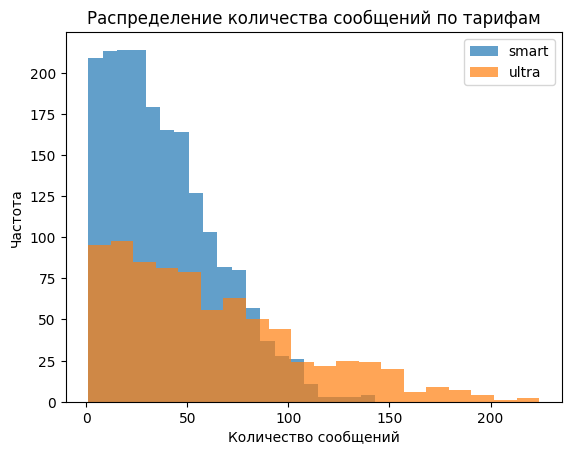

In [160]:
for tariff in monthly_messages['tariff'].unique():
    tariff_data = monthly_messages[monthly_messages['tariff'] == tariff]
    plt.hist(tariff_data['count'], bins=20, alpha=0.7, label=tariff)
plt.title("Распределение количества сообщений по тарифам")
plt.xlabel("Количество сообщений")
plt.ylabel("Частота")
plt.legend()
plt.show()

<h3>Посчитаем для расхода интернет траффика</h3>

Соединим таблицы data_internet и data_users

In [162]:
data_internet_users = pd.merge(data_internet, data_users, on='user_id')
data_internet_users["month"] = data_internet_users['session_date'].dt.to_period("M")
print(data_internet_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   age           149396 non-null  int64         
 5   churn_date    7748 non-null    object        
 6   city          149396 non-null  object        
 7   first_name    149396 non-null  object        
 8   last_name     149396 non-null  object        
 9   reg_date      149396 non-null  object        
 10  tariff        149396 non-null  object        
 11  month         149396 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(7), period[M](1)
memory usage: 13.7+ MB
None


Теперь посчитаем общий объём интернет траффика для каждого пользователя в месяц

In [164]:
monthly_traffic = data_internet_users.groupby(['month', 'tariff', 'user_id'])['mb_used'].sum().reset_index()
print(monthly_traffic)

        month tariff  user_id   mb_used
0     2018-01  smart     1005   2727.97
1     2018-01  smart     1032  24127.69
2     2018-01  smart     1045   2346.71
3     2018-01  smart     1055  17090.88
4     2018-01  smart     1071  15604.34
...       ...    ...      ...       ...
3198  2018-12  ultra     1476  14121.34
3199  2018-12  ultra     1485  23422.76
3200  2018-12  ultra     1491  22061.69
3201  2018-12  ultra     1493  42735.18
3202  2018-12  ultra     1495  23426.76

[3203 rows x 4 columns]


Сгруппируем пользователей по тарифным планам и рассчитаем средний объём интернет-трафика в месяц для каждого тарифа.

In [166]:
avg_traffic_per_tariff = monthly_traffic.groupby(['month', 'tariff'])['mb_used'].mean().reset_index()
print(avg_traffic_per_tariff)

      month tariff       mb_used
0   2018-01  smart   8513.717647
1   2018-01  ultra  13140.681111
2   2018-02  smart  11597.054310
3   2018-02  ultra  12846.477273
4   2018-03  smart  15104.159091
5   2018-03  ultra  17535.550270
6   2018-04  smart  13462.180625
7   2018-04  ultra  16828.134364
8   2018-05  smart  15805.184326
9   2018-05  ultra  19656.534091
10  2018-06  smart  15794.647988
11  2018-06  ultra  19152.950602
12  2018-07  smart  15743.150348
13  2018-07  ultra  20723.394778
14  2018-08  smart  16681.706068
15  2018-08  ultra  19760.734434
16  2018-09  smart  16303.578808
17  2018-09  ultra  19372.735702
18  2018-10  smart  16757.122891
19  2018-10  ultra  20209.643361
20  2018-11  smart  16895.696646
21  2018-11  ultra  19935.585489
22  2018-12  smart  18113.662047
23  2018-12  ultra  21951.094130


Для каждого тарифа рассчитаем дисперсию и стандартное отклонение объёма интернет-трафика в месяц.

In [168]:
stats_per_tariff_internet = monthly_traffic.groupby(['month', 'tariff'])['mb_used'].agg(['var', 'std']).reset_index()
print(stats_per_tariff_internet)

      month tariff           var           std
0   2018-01  smart  4.153391e+07   6444.681014
1   2018-01  ultra  4.713299e+07   6865.346875
2   2018-02  smart  3.902943e+07   6247.353833
3   2018-02  ultra  1.096922e+08  10473.403015
4   2018-03  smart  3.396835e+07   5828.237537
5   2018-03  ultra  1.199416e+08  10951.785885
6   2018-04  smart  3.247004e+07   5698.249092
7   2018-04  ultra  9.445215e+07   9718.649845
8   2018-05  smart  3.573925e+07   5978.231725
9   2018-05  ultra  9.662144e+07   9829.620332
10  2018-06  smart  3.353748e+07   5791.155586
11  2018-06  ultra  8.299037e+07   9109.904861
12  2018-07  smart  3.477643e+07   5897.154446
13  2018-07  ultra  9.767413e+07   9883.022284
14  2018-08  smart  3.023226e+07   5498.387304
15  2018-08  ultra  1.071194e+08  10349.849601
16  2018-09  smart  2.699962e+07   5196.115749
17  2018-09  ultra  8.748982e+07   9353.599420
18  2018-10  smart  3.433239e+07   5859.384492
19  2018-10  ultra  9.354721e+07   9671.980860
20  2018-11  

<h6>Построим гистограммы</h6>

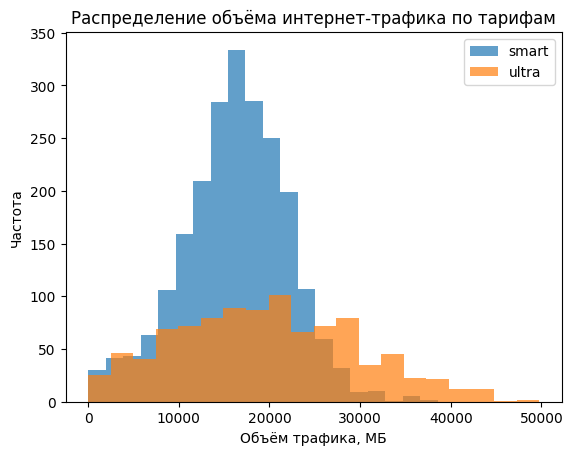

In [170]:
for tariff in monthly_traffic['tariff'].unique():
    tariff_data = monthly_traffic[monthly_traffic['tariff'] == tariff]
    plt.hist(tariff_data['mb_used'], bins=20, alpha=0.7, label=tariff)
plt.title("Распределение объёма интернет-трафика по тарифам")
plt.xlabel('Объём трафика, МБ')
plt.ylabel('Частота')
plt.legend()
plt.show()

<h1>Шаг 4: проверка гипотез</h1>

<h3>Гипотеза 1</h3>

<h4>Нулевая гипотеза (H0): средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова.

Альтернативная гипотеза (H1): средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.</h4>

<h3>Гипотеза 2</h3>

<h4>Нулевая гипотеза (H0): средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Альтернативная гипотеза (H1): средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.</h4>

Соединим таблицу data_calls_users с таблицей data_tariffs

In [174]:
data_calls_users = pd.merge(data_calls_users, data_tariffs, left_on='tariff', right_on='tariff_name')
print(data_calls_users.head(5))

       id  call_date  duration  user_id  age churn_date       city first_name  \
0  1000_0 2018-07-25      0.00     1000   52        NaN  Краснодар     Рафаил   
1  1000_1 2018-08-17      0.00     1000   52        NaN  Краснодар     Рафаил   
2  1000_2 2018-06-11      2.85     1000   52        NaN  Краснодар     Рафаил   
3  1000_3 2018-09-21     13.80     1000   52        NaN  Краснодар     Рафаил   
4  1000_4 2018-12-15      5.18     1000   52        NaN  Краснодар     Рафаил   

   last_name   reg_date  ... rub_per_minute_x tariff_name_x  \
0  Верещагин 2018-05-25  ...                1         ultra   
1  Верещагин 2018-05-25  ...                1         ultra   
2  Верещагин 2018-05-25  ...                1         ultra   
3  Верещагин 2018-05-25  ...                1         ultra   
4  Верещагин 2018-05-25  ...                1         ultra   

   messages_included_y  mb_per_month_included_y  minutes_included_y  \
0                 1000                    30720                

Рассчитаем использование тарифного пакета


In [198]:
data_calls_tariff = data_calls_users.groupby(['user_id', 'tariff_name_x', 'minutes_included_y','rub_per_minute_y','rub_monthly_fee_y'])['duration'].sum().reset_index()
print(data_calls_tariff)

     user_id tariff_name_x  minutes_included_y  rub_per_minute_y  \
0       1000         ultra                3000                 1   
1       1001         smart                 500                 3   
2       1002         smart                 500                 3   
3       1003         ultra                3000                 1   
4       1004         ultra                3000                 1   
..       ...           ...                 ...               ...   
487     1495         ultra                3000                 1   
488     1496         smart                 500                 3   
489     1497         smart                 500                 3   
490     1498         smart                 500                 3   
491     1499         smart                 500                 3   

     rub_monthly_fee_y  duration  
0                 1950   2418.24  
1                  550    799.46  
2                  550   1431.17  
3                 1950   3600.52  
4       

Отсюда уже можем рассчитать перерасход для каждого пользователя

In [208]:
data_calls_tariff['excess_minutes'] = round(data_calls_tariff['duration']-data_calls_tariff['minutes_included_y'])
print(data_calls_tariff)

     user_id tariff_name_x  minutes_included_y  rub_per_minute_y  \
0       1000         ultra                3000                 1   
1       1001         smart                 500                 3   
2       1002         smart                 500                 3   
3       1003         ultra                3000                 1   
4       1004         ultra                3000                 1   
..       ...           ...                 ...               ...   
487     1495         ultra                3000                 1   
488     1496         smart                 500                 3   
489     1497         smart                 500                 3   
490     1498         smart                 500                 3   
491     1499         smart                 500                 3   

     rub_monthly_fee_y  duration  excess_minutes  revenue_calls  
0                 1950   2418.24          -582.0         1950.0  
1                  550    799.46           299.0   

В стобце escess_minutes содержится перерасход минут, если число положительное - значит пользователь привысил лимит

In [210]:
data_calls_tariff['revenue_calls'] =(data_calls_tariff['excess_minutes'].apply(lambda x: max(x,0)) * data_calls_tariff["rub_per_minute_y"])
print(data_calls_tariff)

     user_id tariff_name_x  minutes_included_y  rub_per_minute_y  \
0       1000         ultra                3000                 1   
1       1001         smart                 500                 3   
2       1002         smart                 500                 3   
3       1003         ultra                3000                 1   
4       1004         ultra                3000                 1   
..       ...           ...                 ...               ...   
487     1495         ultra                3000                 1   
488     1496         smart                 500                 3   
489     1497         smart                 500                 3   
490     1498         smart                 500                 3   
491     1499         smart                 500                 3   

     rub_monthly_fee_y  duration  excess_minutes  revenue_calls  
0                 1950   2418.24          -582.0            0.0  
1                  550    799.46           299.0   

<h4>Посчитаем выручку по сообщениям</h4>

In [205]:
data_messages_users = pd.merge(data_messages_users, data_tariffs, left_on='tariff', right_on='tariff_name')
print(data_messages_tariff)

              id message_date  user_id  age churn_date       city first_name  \
0         1000_0   2018-06-27     1000   52        NaN  Краснодар     Рафаил   
1         1000_1   2018-10-08     1000   52        NaN  Краснодар     Рафаил   
2         1000_2   2018-08-04     1000   52        NaN  Краснодар     Рафаил   
3         1000_3   2018-06-16     1000   52        NaN  Краснодар     Рафаил   
4         1000_4   2018-12-05     1000   52        NaN  Краснодар     Рафаил   
...          ...          ...      ...  ...        ...        ...        ...   
123031  1499_179   2018-12-12     1499   35        NaN      Пермь     Гектор   
123032  1499_180   2018-09-28     1499   35        NaN      Пермь     Гектор   
123033  1499_181   2018-09-27     1499   35        NaN      Пермь     Гектор   
123034  1499_182   2018-11-15     1499   35        NaN      Пермь     Гектор   
123035  1499_183   2018-11-16     1499   35        NaN      Пермь     Гектор   

        last_name    reg_date tariff   

In [206]:
data_messages_tariff = data_messages_users.groupby(['user_id', 'messages_included', 'rub_per_message']).size().reset_index(name='count')
print(data_messages_tariff)

     user_id  messages_included  rub_per_message  count
0       1000               1000                1    496
1       1002                 50                3     70
2       1003               1000                1    380
3       1004               1000                1   1192
4       1005                 50                3    552
..       ...                ...              ...    ...
421     1495               1000                1    340
422     1496                 50                3    468
423     1497                 50                3     51
424     1498                 50                3    168
425     1499                 50                3    184

[426 rows x 4 columns]


In [212]:
data_messages_tariff['excess_message'] = data_messages_tariff['count'] - data_messages_tariff['messages_included']
print(data_messages_tariff)

     user_id  messages_included  rub_per_message  count  excess_message  \
0       1000               1000                1    496            -504   
1       1002                 50                3     70              20   
2       1003               1000                1    380            -620   
3       1004               1000                1   1192             192   
4       1005                 50                3    552             502   
..       ...                ...              ...    ...             ...   
421     1495               1000                1    340            -660   
422     1496                 50                3    468             418   
423     1497                 50                3     51               1   
424     1498                 50                3    168             118   
425     1499                 50                3    184             134   

     revenue_messages  
0                   8  
1                 -90  
2                 240  
3  

Если число положительно - значит пользователь привысил лимит сообщений

In [213]:
data_messages_tariff['revenue_messages'] = (data_messages_tariff['excess_message'].apply(lambda x: max(x,0)) * data_messages_tariff['rub_per_message']) 
print(data_messages_tariff)

     user_id  messages_included  rub_per_message  count  excess_message  \
0       1000               1000                1    496            -504   
1       1002                 50                3     70              20   
2       1003               1000                1    380            -620   
3       1004               1000                1   1192             192   
4       1005                 50                3    552             502   
..       ...                ...              ...    ...             ...   
421     1495               1000                1    340            -660   
422     1496                 50                3    468             418   
423     1497                 50                3     51               1   
424     1498                 50                3    168             118   
425     1499                 50                3    184             134   

     revenue_messages  
0                   0  
1                  60  
2                   0  
3  

Посчитаем выручку за интернет-трафик

In [214]:
data_internet_users = pd.merge(data_internet_users, data_tariffs, left_on='tariff', right_on='tariff_name')
print(data_internet_users)

              id  mb_used session_date  user_id  age churn_date       city  \
0         1000_0   112.95   2018-11-25     1000   52        NaN  Краснодар   
1         1000_1  1052.81   2018-09-07     1000   52        NaN  Краснодар   
2         1000_2  1197.26   2018-06-25     1000   52        NaN  Краснодар   
3         1000_3   550.27   2018-08-22     1000   52        NaN  Краснодар   
4         1000_4   302.56   2018-09-24     1000   52        NaN  Краснодар   
...          ...      ...          ...      ...  ...        ...        ...   
149391  1499_152   318.90   2018-10-03     1499   35        NaN      Пермь   
149392  1499_153   490.13   2018-12-14     1499   35        NaN      Пермь   
149393  1499_154     0.00   2018-10-27     1499   35        NaN      Пермь   
149394  1499_155  1246.32   2018-11-26     1499   35        NaN      Пермь   
149395  1499_156   544.37   2018-10-26     1499   35        NaN      Пермь   

       first_name  last_name    reg_date tariff    month  messa

In [259]:
data_internet_tariff = data_internet_users.groupby(['user_id', 'mb_per_month_included', 'rub_per_gb', 'tariff', 'city'])['mb_used'].sum().reset_index()
print(data_internet_tariff)

     user_id  mb_per_month_included  rub_per_gb tariff         city    mb_used
0       1000                  30720         150  ultra    Краснодар  107392.31
1       1001                  15360         200  smart       Москва   32466.00
2       1002                  15360         200  smart  Стерлитамак  116036.52
3       1003                  30720         150  ultra       Москва   57280.64
4       1004                  30720         150  ultra  Новокузнецк  149039.48
..       ...                    ...         ...    ...          ...        ...
492     1495                  30720         150  ultra      Иркутск  127410.56
493     1496                  15360         200  smart      Вологда  270942.29
494     1497                  15360         200  smart    Челябинск   45574.97
495     1498                  15360         200  smart  Владикавказ   74425.22
496     1499                  15360         200  smart        Пермь   50653.15

[497 rows x 6 columns]


In [260]:
data_internet_tariff['excess_mb'] = data_internet_tariff['mb_used'] - data_internet_tariff['mb_per_month_included']
print(data_internet_tariff)

     user_id  mb_per_month_included  rub_per_gb tariff         city  \
0       1000                  30720         150  ultra    Краснодар   
1       1001                  15360         200  smart       Москва   
2       1002                  15360         200  smart  Стерлитамак   
3       1003                  30720         150  ultra       Москва   
4       1004                  30720         150  ultra  Новокузнецк   
..       ...                    ...         ...    ...          ...   
492     1495                  30720         150  ultra      Иркутск   
493     1496                  15360         200  smart      Вологда   
494     1497                  15360         200  smart    Челябинск   
495     1498                  15360         200  smart  Владикавказ   
496     1499                  15360         200  smart        Пермь   

       mb_used  excess_mb  
0    107392.31   76672.31  
1     32466.00   17106.00  
2    116036.52  100676.52  
3     57280.64   26560.64  
4    14

In [261]:
data_internet_tariff['revenue_gb'] = (round((data_internet_tariff['excess_mb'].apply(lambda x: max(x, 0)) / 1024)) * data_internet_tariff['rub_per_gb'])
print(data_internet_tariff)

     user_id  mb_per_month_included  rub_per_gb tariff         city  \
0       1000                  30720         150  ultra    Краснодар   
1       1001                  15360         200  smart       Москва   
2       1002                  15360         200  smart  Стерлитамак   
3       1003                  30720         150  ultra       Москва   
4       1004                  30720         150  ultra  Новокузнецк   
..       ...                    ...         ...    ...          ...   
492     1495                  30720         150  ultra      Иркутск   
493     1496                  15360         200  smart      Вологда   
494     1497                  15360         200  smart    Челябинск   
495     1498                  15360         200  smart  Владикавказ   
496     1499                  15360         200  smart        Пермь   

       mb_used  excess_mb  revenue_gb  
0    107392.31   76672.31     11250.0  
1     32466.00   17106.00      3400.0  
2    116036.52  100676.52  

Посчитаем общую выручку за каждого пользователя


In [262]:
data_merged = pd.merge(data_calls_tariff, data_messages_tariff, on='user_id')
data_merged = pd.merge(data_merged, data_internet_tariff, on='user_id')
print(type(data_merged))

<class 'pandas.core.frame.DataFrame'>


In [263]:
data_merged['revenue'] = (data_merged['rub_monthly_fee_y'] + data_merged['revenue_calls'] + data_merged['revenue_messages'] + data_merged['revenue_gb']) 
print(data_merged)

     user_id tariff_name_x  minutes_included_y  rub_per_minute_y  \
0       1000         ultra                3000                 1   
1       1002         smart                 500                 3   
2       1003         ultra                3000                 1   
3       1004         ultra                3000                 1   
4       1005         smart                 500                 3   
..       ...           ...                 ...               ...   
414     1495         ultra                3000                 1   
415     1496         smart                 500                 3   
416     1497         smart                 500                 3   
417     1498         smart                 500                 3   
418     1499         smart                 500                 3   

     rub_monthly_fee_y  duration  excess_minutes  revenue_calls  \
0                 1950   2418.24          -582.0            0.0   
1                  550   1431.17           931.0 

In [264]:
print(data_merged.groupby(["tariff"])['revenue'].sum().reset_index()) #Общая выручка за каждый тариф

  tariff    revenue
0  smart  7413013.0
1  ultra  2025783.0


<h4>Для проверки гипотез будем использовать t-критерий Стюдента для сравнения средних значений выручки между группами.
t-критерий подходит для сравнения средних значений двух групп; учитывает дисперсию и размер выборки.
Пороговое значение alpha выберем 0.05, что означает 5-процентную вероятность ошибки первого рода</h4>

Проверка первой гипотезы

In [265]:
ultra_revenue = data_merged[data_merged['tariff'] == 'ultra']['revenue']
alpha = 0.05
smart_revenue = data_merged[data_merged['tariff'] == 'smart']['revenue'].mean()
results = st.ttest_1samp(
    ultra_revenue,
    smart_revenue)
print('p_value: ', results.pvalue)
if(results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print('Отвергнуть нулевую гипотезу не получилось, средние выручки тарифов статистически незначимо различаются')
#print(smart_revenue)

p_value:  1.412135637375068e-08
Отвергаем нулевую гипотезу


Проверка второй гипотезы

In [267]:
moscow_revenue = data_merged[data_merged['city'] == 'Москва']['revenue']
print(moscow_revenue)

2       6451.0
5      34792.0
26      3760.0
28     27461.0
33      8180.0
        ...   
380    45411.0
387     2550.0
398    20476.0
402    41928.0
410    34706.0
Name: revenue, Length: 82, dtype: float64


In [270]:
other_cities_revenue = data_merged[data_merged['city'] != 'Москва']['revenue'].mean()
result = st.ttest_1samp(
    moscow_revenue,
    other_cities_revenue
)
print('p-value: ', result.pvalue)
if(result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Отвергнуть нулевую гипотезу не получилось, средние выручки пользователей из Москвы и дргуих городов статистичеки незначимо различаются")

p-value:  0.16861049385236962
Отвергнуть нулевую гипотезу не получилось, средние выручки пользователей из Москвы и дргуих городов статистичеки незначимо различаются
